# Handwritten Digit Classification


For this Hands-on, we will use the popular scikit-learn library to build a basic classifier. The MNIST dataset contains images of handwritten digits, and the task is to classify each image into its corresponding digit (0 to 9).

## Import Libraries

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

## Load the Dataset

**Question 1:** Load the train and test subsets of the mnist dataset from Keras

In [4]:
import tensorflow as tf

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()



## Data Pre-Processing

**Question 2:**  

*   Adjust the input shape to match the one the model is expecting
*   Normalize the values of the pixels
*   Turn labels into categories using the to_categorical function

In [7]:
# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1)/ 225.0
X_test = X_test.reshape (-1, 28, 28, 1)/ 225.0
X_train, X_test = np.array(X_train), np.array(X_test)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


## Build and train a CNN

**Question 3:** Create a Convolutional neural Network of your choice and be carefyl while you select the following:


*   input shape
*   activation function at the output layer
*   number of output neurons



In [8]:

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense



# Build the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))






**Question 4:** Compile and train the model. Choose an appropriate loss function, optimizer, and print out the accuracy of the model.

In [10]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 52s 136ms/step - loss: 1.0628 - accuracy: 0.6609 - val_loss: 0.3744 - val_accuracy: 0.8862
Epoch 2/10
375/375 [==============================] - 50s 135ms/step - loss: 0.3434 - accuracy: 0.8960 - val_loss: 0.2670 - val_accuracy: 0.9212
Epoch 3/10
375/375 [==============================] - 41s 109ms/step - loss: 0.2507 - accuracy: 0.9230 - val_loss: 0.1945 - val_accuracy: 0.9465
Epoch 4/10
375/375 [==============================] - 38s 100ms/step - loss: 0.1876 - accuracy: 0.9439 - val_loss: 0.1519 - val_accuracy: 0.9578
Epoch 5/10
375/375 [==============================] - 34s 91ms/step - loss: 0.1417 - accuracy: 0.9572 - val_loss: 0.1222 - val_accuracy: 0.9645
Epoch 6/10
375/375 [==============================] - 33s 88ms/step - loss: 0.1159 - accuracy: 0.9653 - val_loss: 0.1088 - val_accuracy: 0.9687
Epoch 7/10
375/375 [==============================] - 35s 92ms/step - loss: 0.1003 - accuracy: 0.9689 - val_loss: 0.1054 - val_accur

## Evaluate the Model's performance

**Question 5:** Plot the training and validation accuracy to better understand the performance of the model.

313/313 [==============================] - 3s 8ms/step - loss: 19.2987 - accuracy: 0.9445
Test Accuracy: 0.9445000290870667


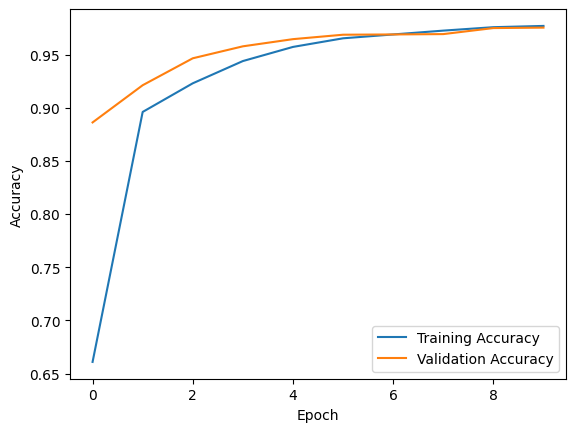

In [11]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')


plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
